# Predictive Analysis: Cluster Membership

In [1]:
# import and load

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
# Load normalized expression data
log_cpm = pd.read_parquet("../data/dlbc_log_cpm.parquet")

# Transpose to samples × genes
X = log_cpm.T
X.shape

(48, 23920)

In [10]:
# Identify most variable gene
gene_variances = log_cpm.var(axis=1)
target_gene = gene_variances.idxmax()
target_gene

'ENSG00000129824'

In [11]:
y = (log_cpm.loc[target_gene] > log_cpm.loc[target_gene].median()).astype(int)
np.bincount(y)

array([24, 24])

In [12]:
X = log_cpm.drop(index=target_gene).T
X.shape

(48, 23919)

In [13]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=10)),
    ("logreg", LogisticRegression(
        penalty="l2",
        solver="lbfgs",
        max_iter=1000,
        random_state=2025
    ))
])

cv_accuracy = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

cv_accuracy, cv_accuracy.mean()

(array([0.6       , 0.5       , 0.5       , 0.22222222, 0.55555556]),
 0.4755555555555556)

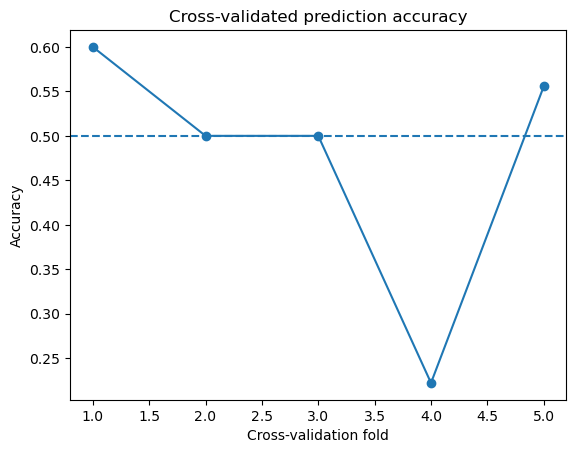

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(
    np.arange(1, len(cv_accuracy) + 1),
    cv_accuracy,
    marker="o"
)
plt.axhline(0.5, linestyle="--")
plt.xlabel("Cross-validation fold")
plt.ylabel("Accuracy")
plt.title("Cross-validated prediction accuracy")
plt.show()